In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats
from datetime import timedelta
from collections import Counter
import cx_Oracle
import seaborn as sns
#from warnings import filterwarnings
#filterwarnings('ignore')

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
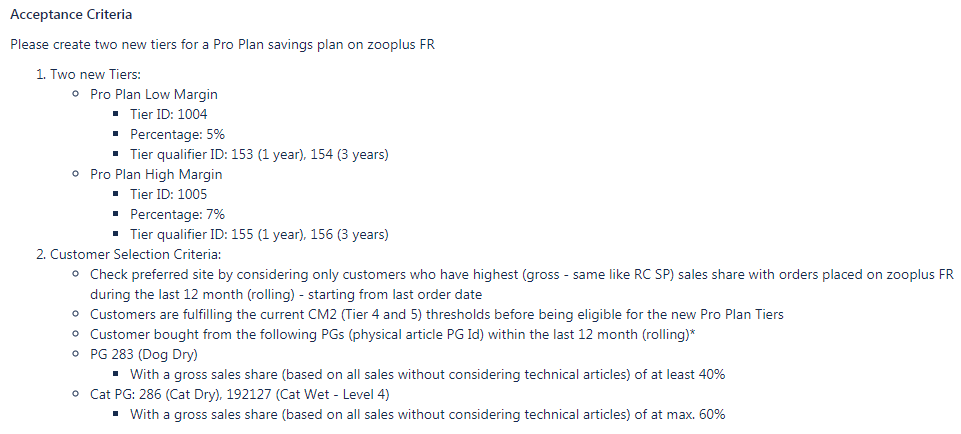

#### Data loading and processing

In [2]:
data = pd.read_csv('pro_plan_sp_order_positions_pg_q1_and_q2_04092018.dsv', sep=';', low_memory=False)

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209368 entries, 0 to 209367
Data columns (total 34 columns):
SCM_N_ORDER_POS_NR              209368 non-null int64
SCM_N_ORDER_NR                  209368 non-null int64
TDT_T_KEY_ORDER_DATE            209368 non-null object
THR_C_KEY_ORDER_HOUR            209368 non-null object
SIT_N_KEY_SITE                  209368 non-null int64
CUS_N_KEY_CUSTOMER              209368 non-null int64
SCM_SALES_BMF                   209368 non-null object
SCM_SALES_CANCEL_BMF            209368 non-null object
SCM_D_FINANCE_CM1               209368 non-null object
SCM_D_FINANCE_CM2               209368 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    209368 non-null object
SCM_AP_ID                       209368 non-null int64
SCM_AS_ID                       209368 non-null int64
SCM_MASTER_AP_ID                209368 non-null int64
SCM_IS_ZSP_ORDER                209368 non-null int64
SCM_C_ORDER_STATUS              209368 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,PP_ID,PG_ID,PG4_PARENT_ID,PG3_PARENT_ID,PP_NAME,AP_SHORT_TEXT
0,452464990,106108479,07/03/2018 00:00,11:53,4,8755557,0,0,"-1,4","-2,3452",...,23/01/2021 23:59,156,7,"9,99",28046.0,910.0,47.0,4.0,Holzball mit Glöckchen,- 6 cm
1,474206390,111418442,26/05/2018 00:00,12:48,4,8755557,"3,99",0,"2,335","1,6512",...,23/01/2021 23:59,156,7,"9,99",15517.0,910.0,47.0,4.0,Kleintierwippe,"- 32,5 x 7,5 x 14 cm"
2,450065047,105538617,27/02/2018 00:00,16:52,4,15963235,"3,99",0,"1,535","0,9988",...,02/12/2020 23:59,156,7,"9,99",10098.0,910.0,47.0,4.0,Spieltunnel für Kaninchen,-
3,472628912,111025833,20/05/2018 00:00,17:45,4,15963235,"1,99",0,"1,3883","0,9851",...,02/12/2020 23:59,156,7,"9,99",28046.0,910.0,47.0,4.0,Holzball mit Glöckchen,- 6 cm
4,451852849,105960865,05/03/2018 00:00,13:38,4,10157201,"11,97",0,"4,605","3,7308",...,05/01/2021 23:59,156,7,"9,99",27313.0,910.0,47.0,4.0,Target Stick,- 1 Stück


In [5]:
def get_date(x):
    return x.split(' ')[0]

In [6]:
data['TDT_T_KEY_ORDER_DATE'] = data['TDT_T_KEY_ORDER_DATE'].map(get_date)

In [7]:
%run -i cleaning_n_formatting.py

Duplicated rows detected:  892
Start dropping..
Number of order IDs having more than one SP_START_DATE now:  0


In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208476 entries, 0 to 209367
Data columns (total 40 columns):
SCM_N_ORDER_POS_NR              208476 non-null int64
SCM_N_ORDER_NR                  208476 non-null int64
TDT_T_KEY_ORDER_DATE            208476 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            208476 non-null object
SIT_N_KEY_SITE                  208476 non-null int64
CUS_N_KEY_CUSTOMER              208476 non-null int64
SCM_SALES_BMF                   208476 non-null float64
SCM_SALES_CANCEL_BMF            208476 non-null float64
SCM_D_FINANCE_CM1               208476 non-null float64
SCM_D_FINANCE_CM2               208476 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    208476 non-null float64
SCM_AP_ID                       208476 non-null int64
SCM_AS_ID                       208476 non-null int64
SCM_MASTER_AP_ID                208476 non-null int64
SCM_IS_ZSP_ORDER                208476 non-null int64
SCM_C_ORDER_STATUS              208476 non-null object
CTP_

In [9]:
data.head(10)

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,PG4_PARENT_ID,PG3_PARENT_ID,PP_NAME,AP_SHORT_TEXT,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2
0,452464990,106108479,2018-03-07,11:53,4,8755557,0.00,0.0,-1.4000,-2.3452,...,47.0,4.0,Holzball mit Glöckchen,- 6 cm,2018-03-07 11:53:00,10,3,42.6001,-3.286377,-5.505151
1,474206390,111418442,2018-05-26,12:48,4,8755557,3.99,0.0,2.3350,1.6512,...,47.0,4.0,Kleintierwippe,"- 32,5 x 7,5 x 14 cm",2018-05-26 12:48:00,21,5,136.1000,1.715650,1.213226
2,450065047,105538617,2018-02-27,16:52,4,15963235,3.99,0.0,1.5350,0.9988,...,47.0,4.0,Spieltunnel für Kaninchen,-,2018-02-27 16:52:00,9,2,70.1417,2.188427,1.423975
3,472628912,111025833,2018-05-20,17:45,4,15963235,1.99,0.0,1.3883,0.9851,...,47.0,4.0,Holzball mit Glöckchen,- 6 cm,2018-05-20 17:45:00,20,5,94.0667,1.475868,1.047236
4,451852849,105960865,2018-03-05,13:38,4,10157201,11.97,0.0,4.6050,3.7308,...,47.0,4.0,Target Stick,- 1 Stück,2018-03-05 13:38:00,10,3,100.7917,4.568829,3.701495
5,433285525,101559240,2018-01-01,12:17,4,8508366,2.99,0.0,1.4717,1.4216,...,47.0,4.0,Baumwollspielseil mit Holzklötzchen,- ca. L 20 cm,2018-01-01 12:17:00,1,1,186.6749,0.788376,0.761538
6,450023755,105528837,2018-02-27,14:42,4,10842104,1.59,0.0,0.9850,0.6384,...,47.0,4.0,Baumwollspielseil mit Holzklötzchen,- ca. L 20 cm,2018-02-27 14:42:00,9,2,38.2500,2.575163,1.669020
7,450023753,105528837,2018-02-27,14:42,4,10842104,1.79,0.0,1.2117,0.8630,...,47.0,4.0,Holzball mit Glöckchen,- 6 cm,2018-02-27 14:42:00,9,2,38.2500,3.167843,2.256209
8,480294793,112951278,2018-06-17,18:26,4,12481417,4.49,0.0,1.9517,1.4611,...,47.0,4.0,Target Stick,- 1 Stück,2018-06-17 18:26:00,24,6,49.9751,3.905345,2.923656
9,440019538,103169411,2018-01-24,08:36,4,12101375,3.49,0.0,1.1183,1.0952,...,47.0,4.0,Target Stick,- 1 Stück,2018-01-24 08:36:00,4,1,143.6250,0.778625,0.762541


In [10]:
data['CZP_ZTQ_ID'].unique()

array([156, 155, 154, 153], dtype=int64)

In [11]:
#Not equal to 0 means the value being cancelled
data['POS_VALID'] = (data['SCM_SALES_CANCEL_BMF'] == 0) * 1 

In [12]:
data[data['POS_VALID'] == 0][['SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_ORIG_FINANCE_ORDER_NET']].sample(10)

,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_ORIG_FINANCE_ORDER_NET
65498,27.990,23.330,23.3250
83726,9.990,8.330,8.3250
134564,33.990,14.165,28.3250
159080,10.990,9.160,9.1583
37186,47.990,19.995,39.9917
40204,44.990,37.490,37.4917
97012,15.990,13.330,13.3250
89772,8.990,7.490,7.4917
123639,1.490,1.240,1.2417
131944,20.985,5.830,17.4875


In [13]:
data['TAXES'] = data['SCM_SALES_BMF'] / data['SCM_D_ORIG_FINANCE_ORDER_NET']

In [14]:
data[['SCM_SALES_BMF', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'TAXES']].sample(10)

,SCM_SALES_BMF,SCM_D_ORIG_FINANCE_ORDER_NET,TAXES
101005,11.9900,9.9917,1.199996
115316,47.9900,39.9917,1.199999
95521,3.9900,3.3250,1.200000
76963,11.9900,9.9917,1.199996
176031,-2.8000,-2.3333,1.200017
54137,22.9900,19.1583,1.200002
13577,0.0000,0.0000,NaN
196030,0.5900,0.4917,1.199919
137587,19.0751,15.8959,1.200001
17033,17.9900,14.9917,1.199997


In [15]:
data['BASKET_VALUE'] = (data['SCM_SALES_BMF'] * data['POS_VALID']).groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [16]:
data['O_POS_SHARE'] = (data['SCM_SALES_BMF'] * data['POS_VALID']) / data['BASKET_VALUE']

In [17]:
pg4share = [float(str(i).replace(',','.')) for i in data['OSP_4_LEAD_P_PG_SHARE'].values]
data['OSP_4_LEAD_P_PG_SHARE'] = pg4share

#### Gross sales, net sales

In [18]:
# 3.4M € gross sales
np.round((data['SCM_SALES_BMF'] * data['POS_VALID']).sum(), 2)

3378191.17

In [19]:
# 2.8M € net sales
np.round(sum(data['SCM_D_ORIG_FINANCE_ORDER_NET'] * data['POS_VALID']), 2)

2816856.03

#### Revenue of SP sold

In [20]:
data[data['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].value_counts()

2.99    2442
5.99    1028
4.99     894
9.99     476
Name: CZP_PRICE, dtype: int64

In [21]:
np.round(data[data['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].sum(), 2)

22675.6

#### SP discount

In [22]:
# 200K €
np.round(data[data['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'].sum(), 2)

-199704.82

#### How would it be in case we had brand specific SP where discounts only apply to Brand product groups?

In [23]:
data.columns

Index(['SCM_N_ORDER_POS_NR', 'SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE',
       'THR_C_KEY_ORDER_HOUR', 'SIT_N_KEY_SITE', 'CUS_N_KEY_CUSTOMER',
       'SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_FINANCE_CM1',
       'SCM_D_FINANCE_CM2', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'SCM_AP_ID',
       'SCM_AS_ID', 'SCM_MASTER_AP_ID', 'SCM_IS_ZSP_ORDER',
       'SCM_C_ORDER_STATUS', 'CTP_N_KEY_CUSTOMER_TYPE', 'SCM_OCI_LAND',
       'OSP_KO_COUNT_NET', 'OSP_3_LEAD_P_PG_ID', 'OSP_3_LEAD_P_PG_SHARE',
       'OSP_4_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_SHARE', 'CZP_START_DATE',
       'CZP_EXPIRY_DATE', 'CZP_ZTQ_ID', 'CZP_PERCENTAGE', 'CZP_PRICE', 'PP_ID',
       'PG_ID', 'PG4_PARENT_ID', 'PG3_PARENT_ID', 'PP_NAME', 'AP_SHORT_TEXT',
       'ORDER_DATETIME', 'WEEK_NUMBER', 'MONTH_NUMBER', 'FINANCE_ORDER_NET',
       'REL_CM1', 'REL_CM2', 'POS_VALID', 'TAXES', 'BASKET_VALUE',
       'O_POS_SHARE'],
      dtype='object')

+ Reverse the discount applying and get new sales value per order

In [24]:
data_without_sp_disc = data[~(data['SCM_MASTER_AP_ID'] == 42715)]

In [25]:
without_sp_disc = data_without_sp_disc.copy()

In [26]:
# Total sales value if there was no SP discount applying on these orders
np.round(sum(without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['POS_VALID']), 2)

3577895.99

+ Locate the suitable products for the specific brand SP

In [27]:
#query = """select PPR_N_PHY_PRODUCT_ID
#    , PPR_N_PHY_ARTICLE_ID
#    , PPR_V_PRODUCT_DESC
#    , PPR_V_LOGISTICS_DESC
#    , PPR_BRAND
#from zoocube.DDSTD_PPR_PHYS_PRODUCT
#where PPR_BRAND like '%ro%lan%'"""

In [28]:
query = """select *
from zoocube.DDSTD_PPR_PHYS_PRODUCT
where PPR_N_LEVEL4_ID in (283, 286, 192127)"""

In [29]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4ids = pd.read_sql(query, con = conn)
conn.close()

In [30]:
pg4ids

,PPR_N_KEY_PHYS_PRODUCT,PPR_N_PHY_PRODUCT_ID,PPR_N_PHY_ARTICLE_ID,PPR_V_PRODUCT_DESC,PPR_V_LOGISTICS_DESC,PPR_N_LEVEL1_ID,PPR_V_LEVEL1_DESC,PPR_N_LEVEL2_ID,PPR_V_LEVEL2_DESC,PPR_N_LEVEL3_ID,...,PPR_IS_HIGH_CLV,PPR_BRAND,PPR_PG_PRIORITY,PPR_EAN,PPR_NR_AT_SUPPLIER,PPR_AP_IS_LISTED,PPR_ARTICLE_CLASS_ID,PPR_ART_CLASS_DESC,PPR_TAX_CODE,PPR_APA_DESC
0,5771,2159,3296,2159 - Pro Plan Dog Adult Dog Huhn + Reis,3296 - Pro Plan Dog Adult Dog - 15 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000583,5100138,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
1,5772,2159,3295,2159 - Pro Plan Dog Adult Dog Huhn + Reis,3295 - Pro Plan Dog Adult Dog H- 3 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,7613033208263,12150307,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
2,5773,2160,1495,2160 - Pro Plan Dog Performance Huhn,1495 - Pro Plan Dog Performanc- 800 g,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000-651,1023300,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
3,5775,2160,3418,2160 - Pro Plan Dog Performance Huhn,3418 - Pro Plan Dog Performanc- 15 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000682,05100158,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
4,5776,2160,3416,2160 - Pro Plan Dog Performance Huhn,3416 - Pro Plan Dog Performance- 3 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,8410650530306,8473000,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
5,5777,2161,1500,2161 - Pro Plan Dog Adult Light Huhn,1500 - Pro Plan Dog Adult Ligh- 800 g,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000-705,8143000,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
6,5778,2161,11891,2161 - Pro Plan Dog Adult Light Huhn,11891 - Pro Plan Dog Adult Light- 3 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,07613033209994,12150387,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
7,5779,2161,3420,2161 - Pro Plan Dog Adult Light Huhn,3420 - Pro Plan Dog Adult Ligh- 15 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000736,5100163,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
8,5780,2161,3419,2161 - Pro Plan Dog Adult Light Huhn,"3419 - Pro Plan Dog Adult Lig- 7,5 kg",2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,8410650530758,8454000,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
9,5782,2158,3294,2158 - Pro Plan Dog Puppy Huhn + Reis,"3294 - Pro Plan Dog Puppy Huh- 7,5 kg",2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000439,5119955,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU


In [31]:
proplan_prods = list(set(pg4ids['PPR_N_PHY_ARTICLE_ID']))

In [32]:
proplan_names = list(without_sp_disc[without_sp_disc['SCM_AP_ID'].isin(proplan_prods)]['PP_NAME'].unique())

In [33]:
len(proplan_names)

55

In [34]:
proplan_names

['Pro Plan Cat Sterilised reich an Truthahn',
 'Pro Plan Cat Adult Delicate',
 'Pro Plan Cat Housecat',
 'Pro Plan Derma Plus',
 'Pro Plan Cat Sterilised reich an Lachs',
 'Pro Plan Cat Adult Cat Huhn & Reis',
 'Pro Plan Kitten/Junior  Huhn & Reis',
 'Pro Plan Cat Adult Light',
 'Pro Plan Dental Plus',
 'Pro Plan Large Adult Atheltic Huhn & Reis',
 'Pro Plan Medium Adult Huhn & Reis',
 'Pro Plan All sizes Adult Light Sterilised Huhn & Reis',
 'Pro Plan Small & Mini Adult Sensitive Skin Lachs & Reis',
 'Pro Plan Large Adult Robust Huhn & Reis',
 'Pro Plan Medium Adult Sensitive Skin Lachs & Reis',
 'Pro Plan Large Ath. Adult Lamm',
 'Pro Plan Medium Adult Lamm',
 'Pro Plan Large Puppy Athletic Huhn & Reis',
 'Pro Plan Medium Puppy Huhn & Reis',
 'Pro Plan Medium & Large Adult 7+ Sensitive Skin Lachs & Reis',
 'PP Large Adult Athletic Sensitive Skin Salmon',
 'Pro Plan All sizes Adult Performance Huhn & Reis',
 'Pro Plan Medium Puppy Sensitive Skin Lachs & Reis',
 'Pro Plan Medium Puppy 

In [35]:
# List every product group from Pro Plan...
#pp_prod_groups = list(without_sp_disc[without_sp_disc['PP_NAME'].fillna('-').str.contains('Pro Plan')]['PP_NAME'].unique()) + \
#                 list(without_sp_disc[without_sp_disc['PP_NAME'].fillna('-').str.contains('PRO PLAN')]['PP_NAME'].unique()) +\
#                 list(without_sp_disc[without_sp_disc['PP_NAME'].fillna('-').str.contains('PP')]['PP_NAME'].unique()) 

In [36]:
#len(pp_prod_groups)

In [37]:
#pp_prod_groups

In [38]:
#included_pp_prod_groups = [i for i in pp_prod_groups if 'VET' not in i]

In [39]:
#len(included_pp_prod_groups)

In [40]:
#set(included_pp_prod_groups) - set(proplan_names)

In [41]:
without_sp_disc['DISC_POS'] = (without_sp_disc['SCM_AP_ID'].isin(proplan_prods)) * 1

In [42]:
without_sp_disc[['PP_NAME', 'SCM_SALES_BMF', 'DISC_POS', 'CZP_PERCENTAGE']].sample(20)

,PP_NAME,SCM_SALES_BMF,DISC_POS,CZP_PERCENTAGE
31788,Pro Plan All sizes Adult Light Sterilised Huhn...,94.9900,1,5
114607,Dreamies Katzensnack,2.7800,0,5
158094,Hill's SP Feline Adult No Grain,43.9800,0,5
140028,Megapack Gourmet Gold Feine Pastete 12 x 85g,4.8685,0,7
155942,MP Catz Finefood 6 x 400 g Dose,14.9900,0,5
133692,Nullodor Silikatstreu,14.9700,0,5
191124,NaN,3.9900,0,5
52472,Concept for Life Sterilised Cats,10.4700,0,5
146896,MP Almo Nature Classic 6 x 55 g,4.1900,0,5
152766,Plüschmaus mit Catnip Katzenspielzeug,1.4900,0,7


+ Apply SP discount only on the suitable order positions

In [43]:
without_sp_disc['NEW_SALES_VALUE'] = without_sp_disc['SCM_SALES_BMF'] - \
((without_sp_disc['SCM_SALES_BMF'] * without_sp_disc['CZP_PERCENTAGE'] / 100) * without_sp_disc['DISC_POS'])

In [44]:
without_sp_disc[['PP_NAME', 'SCM_SALES_BMF', 'DISC_POS', 'CZP_PERCENTAGE', 'NEW_SALES_VALUE']].sample(20)

,PP_NAME,SCM_SALES_BMF,DISC_POS,CZP_PERCENTAGE,NEW_SALES_VALUE
49626,Smilla Trockenfutter Adult Rind,3.3082,0,5,3.3082
110015,Seresto Halsband Hund (FR),49.9800,0,5,49.9800
80061,MP Schesir Cat Jelly Dose 6x85g,19.9900,0,5,19.9900
41957,INNE CAT STERILIZED,39.9900,0,7,39.9900
63888,Royal Canin Breed Dachshund,35.9700,0,7,35.9700
82819,"Megapack Lukullus 6 x 400g, gemischtes Paket",6.9900,0,7,6.9900
1340,Pro Plan Cat Sterilised reich an Truthahn,54.9900,1,5,52.2405
83848,"Megapack Felix ""So gut..."" Doppelt Lecker 24 x...",14.5800,0,7,14.5800
36491,Hill's Canine Adult Perfect Weight Large Breed,95.9900,0,5,95.9900
146004,MP Almo Nature Legend 6 x 70 g,21.9900,0,7,21.9900


#### With new brand specific scenario...

##### Gross sales, net sales

In [45]:
# 3.5M € gross sales
np.round(sum(without_sp_disc['NEW_SALES_VALUE'] * without_sp_disc['POS_VALID']), 2)

3510655.55

In [46]:
# 2.9M € net sales
np.round((without_sp_disc['NEW_SALES_VALUE'] / without_sp_disc['TAXES'] * without_sp_disc['POS_VALID']).sum(), 2)

2927325.54

##### Revenue of SP sold

In [47]:
without_sp_disc[without_sp_disc['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].value_counts()

2.99    2442
5.99    1028
4.99     894
9.99     476
Name: CZP_PRICE, dtype: int64

In [48]:
np.round(without_sp_disc[without_sp_disc['SCM_MASTER_AP_ID'] == 42225]['CZP_PRICE'].sum(), 2)

22675.6

##### SP discount

In [49]:
# 68k €
np.round((without_sp_disc['SCM_SALES_BMF'] - without_sp_disc['NEW_SALES_VALUE']).sum(), 2)

67728.35

#### Comparison

|  | Gross sales | Net sales | Revenue of SP sold | SP discount |
| --- | --- | --- | --- |
| OLD Pro Plan SP | 3378191 € | 2816856 € | 22676 € | 199705 € | 
| Brand-specific Pro Plan SP | 3510656 € | 2927326 € | 22676 € | 67728 € |
|Delta| 3.92% | 3.92% | 0% | -66.09% |

Deltas have been calculated like this: (new state - previous state) / previous state * 100

In [50]:
# Orders including Brand Specific Products 
orders_with_bs_prods = without_sp_disc[(without_sp_disc['DISC_POS'] == 1) & (without_sp_disc['POS_VALID'] == 1)]['SCM_N_ORDER_NR'].unique()

In [51]:
len(orders_with_bs_prods)

18038

In [52]:
# All orders
without_sp_disc['SCM_N_ORDER_NR'].nunique()

40135

In [53]:
# % from Orders having Brand specific products
np.round(without_sp_disc[(without_sp_disc['DISC_POS'] == 1) & (without_sp_disc['POS_VALID'] == 1)]['SCM_N_ORDER_NR'].nunique() /\
without_sp_disc['SCM_N_ORDER_NR'].nunique() * 100, 2)

44.94

In [54]:
orders_with_bs_prods

array([105623779, 111520099, 103000297, ..., 113854661, 113682267,
       113401933], dtype=int64)

Further needs:
    + Set up new prices
    + Increase discounts?
    + Eligibility criteria: orders, CM2%, brand share!

#### Logic

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
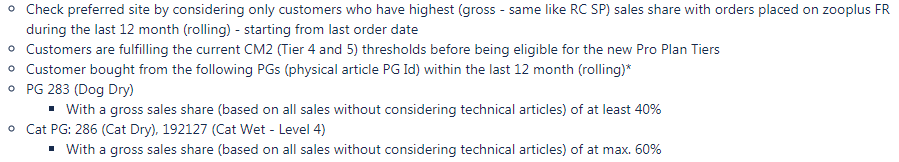

In [55]:
pg4ids.head()

,PPR_N_KEY_PHYS_PRODUCT,PPR_N_PHY_PRODUCT_ID,PPR_N_PHY_ARTICLE_ID,PPR_V_PRODUCT_DESC,PPR_V_LOGISTICS_DESC,PPR_N_LEVEL1_ID,PPR_V_LEVEL1_DESC,PPR_N_LEVEL2_ID,PPR_V_LEVEL2_DESC,PPR_N_LEVEL3_ID,...,PPR_IS_HIGH_CLV,PPR_BRAND,PPR_PG_PRIORITY,PPR_EAN,PPR_NR_AT_SUPPLIER,PPR_AP_IS_LISTED,PPR_ARTICLE_CLASS_ID,PPR_ART_CLASS_DESC,PPR_TAX_CODE,PPR_APA_DESC
0,5771,2159,3296,2159 - Pro Plan Dog Adult Dog Huhn + Reis,3296 - Pro Plan Dog Adult Dog - 15 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000583,5100138,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
1,5772,2159,3295,2159 - Pro Plan Dog Adult Dog Huhn + Reis,3295 - Pro Plan Dog Adult Dog H- 3 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,7613033208263,12150307,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
2,5773,2160,1495,2160 - Pro Plan Dog Performance Huhn,1495 - Pro Plan Dog Performanc- 800 g,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000-651,1023300,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
3,5775,2160,3418,2160 - Pro Plan Dog Performance Huhn,3418 - Pro Plan Dog Performanc- 15 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,3596980000682,05100158,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU
4,5776,2160,3416,2160 - Pro Plan Dog Performance Huhn,3416 - Pro Plan Dog Performance- 3 kg,2719,2719 - zooplus.de,2,2 - Hund,251,...,High CLV Article,Pro Plan,2,8410650530306,8473000,0,26,"Premium Brands by P, Nestle and Hills",Low,SKU


In [56]:
pg4ids['PPR_BRAND'].unique()

array(['Pro Plan', 'unknown'], dtype=object)

In [57]:
#Technical articles are those having AS_ID < 50, let's check their SCM_MASTER_AP_ID
without_sp_disc[without_sp_disc['SCM_AS_ID'] < 50]['SCM_MASTER_AP_ID'].unique()

array([6168, 6169, 5482], dtype=int64)

In [58]:
without_sp_disc[without_sp_disc['SCM_AS_ID'] <= 50][without_sp_disc.columns[:20]].sample(20)

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,OSP_KO_COUNT_NET,OSP_3_LEAD_P_PG_ID
186349,439399976,103023827,2018-01-22,10:40,4,4812846,0.59,0.0,0.4917,0.4917,0.4917,0,2,6168,0,L,0,F,25,252
200346,449288284,105354707,2018-02-25,12:54,4,17595766,4.58,0.0,3.8167,3.8167,3.8167,0,2,6168,0,L,0,F,11,1540
192653,476693138,112036235,2018-06-04,12:37,4,7715480,-10.15,0.0,-8.4583,-8.4583,-8.4583,0,1,6169,1,L,0,F,76,252
174762,434970961,101970599,2018-01-07,03:56,4,8107837,0.59,0.0,0.4917,0.4917,0.4917,0,2,6168,0,L,0,F,32,29
183929,433258444,101552609,2018-01-01,09:41,4,3909387,0.59,0.0,0.4917,0.4917,0.4917,0,2,6168,0,L,0,F,101,207553
175169,454639641,106626276,2018-03-14,19:36,4,3411329,-3.14,0.0,-2.6167,-2.6167,-2.6167,0,1,6169,0,L,0,F,57,251
201050,477696717,112293077,2018-06-07,15:12,4,10123013,3.99,0.0,3.3250,3.3250,3.3250,0,2,6168,0,L,0,F,51,857
183469,479850034,112840051,2018-06-15,14:22,4,1540024,0.00,0.0,0.0000,0.0000,0.0000,0,1,6169,1,L,0,F,53,301
168701,476538363,111996068,2018-06-03,21:51,4,12017749,0.00,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,F,47,252
178074,458830231,107587429,2018-03-28,13:19,4,15520995,4.58,0.0,3.8167,3.8167,3.8167,0,2,6168,0,L,0,F,12,2068


In [59]:
technical_arts = [6168, 6169, 5482, 42225] #delivery fee, coupons, discount group, savings plan article (SCM_MASTER_AP_ID)

As we have already excluded SP discount from our dataframe we only need to exclude the other technical articles to calculate the proper Pro Plan share per order...

In [60]:
clean_orders = without_sp_disc[without_sp_disc['SCM_N_ORDER_NR'].isin(orders_with_bs_prods) &
                               ~(without_sp_disc['SCM_MASTER_AP_ID'].isin(technical_arts))]

In [61]:
clean_ord = clean_orders.copy()

In [62]:
clean_ord[clean_ord['SCM_N_ORDER_NR'] == 111520099][clean_ord.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,OSP_KO_COUNT_NET,OSP_3_LEAD_P_PG_ID
448,474627723,111520099,2018-05-28,09:32,4,9808705,22.9900,0.0,4.6083,2.2383,19.1583,73737,2184569,73737,0,L,0,F,27,252
41134,474627724,111520099,2018-05-28,09:32,4,9808705,20.3909,0.0,2.1715,-0.6024,16.9924,58751,2409536,58751,0,L,0,F,27,252
41135,474627722,111520099,2018-05-28,09:32,4,9808705,20.3640,0.0,2.5496,-0.2207,16.9700,58755,2409652,58755,0,L,0,F,27,252
67733,474627724,111520099,2018-05-28,09:32,4,9808705,2.5991,0.0,0.2768,-0.0768,2.1659,66003,2409536,58751,0,L,0,F,27,252
67734,474627722,111520099,2018-05-28,09:32,4,9808705,2.6260,0.0,0.3288,-0.0285,2.1883,66003,2409652,58755,0,L,0,F,27,252
110876,474627725,111520099,2018-05-28,09:32,4,9808705,0.0000,0.0,-0.3500,-0.7354,0.0000,54607,1114229,54607,0,L,0,F,27,252
120402,474627726,111520099,2018-05-28,09:32,4,9808705,7.9900,0.0,3.1783,2.7859,6.6583,39104,933697,39104,0,L,0,F,27,252


In [63]:
clean_ord.columns

Index(['SCM_N_ORDER_POS_NR', 'SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE',
       'THR_C_KEY_ORDER_HOUR', 'SIT_N_KEY_SITE', 'CUS_N_KEY_CUSTOMER',
       'SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_FINANCE_CM1',
       'SCM_D_FINANCE_CM2', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'SCM_AP_ID',
       'SCM_AS_ID', 'SCM_MASTER_AP_ID', 'SCM_IS_ZSP_ORDER',
       'SCM_C_ORDER_STATUS', 'CTP_N_KEY_CUSTOMER_TYPE', 'SCM_OCI_LAND',
       'OSP_KO_COUNT_NET', 'OSP_3_LEAD_P_PG_ID', 'OSP_3_LEAD_P_PG_SHARE',
       'OSP_4_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_SHARE', 'CZP_START_DATE',
       'CZP_EXPIRY_DATE', 'CZP_ZTQ_ID', 'CZP_PERCENTAGE', 'CZP_PRICE', 'PP_ID',
       'PG_ID', 'PG4_PARENT_ID', 'PG3_PARENT_ID', 'PP_NAME', 'AP_SHORT_TEXT',
       'ORDER_DATETIME', 'WEEK_NUMBER', 'MONTH_NUMBER', 'FINANCE_ORDER_NET',
       'REL_CM1', 'REL_CM2', 'POS_VALID', 'TAXES', 'BASKET_VALUE',
       'O_POS_SHARE', 'DISC_POS', 'NEW_SALES_VALUE'],
      dtype='object')

In [64]:
# Number of orders group by Lead PG4 - orders having at least one Pro Plan product -
clean_ord.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_ID'].unique().value_counts().head(25)

[283]       11978
[286]        2545
[192127]      466
[683]         262
[682]         163
[31962]       128
[2127]        115
[81397]       114
[10331]       113
[81396]        98
[31963]        89
[17798]        79
[2072]         72
[17963]        69
[719]          67
[180361]       62
[720]          60
[261925]       58
[47690]        56
[2071]         56
[81431]        50
[255]          45
[95904]        41
[9498]         39
[304]          35
Name: OSP_4_LEAD_P_PG_ID, dtype: int64

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
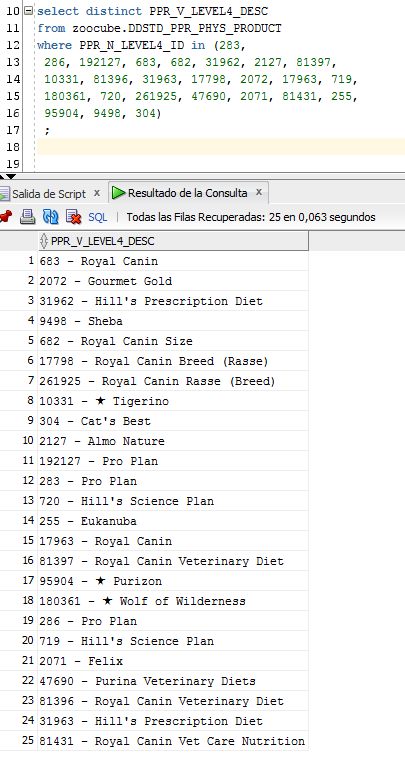

In [65]:
# Number of orders group by Lead PG4 - orders without Pro Plan products -
without_sp_disc[~(without_sp_disc['SCM_N_ORDER_NR'].isin(orders_with_bs_prods))].groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_ID'].unique().value_counts().head(25)

[683]       1603
[682]       1041
[10331]      750
[81397]      645
[95904]      618
[31963]      558
[2127]       546
[180361]     543
[31962]      520
[81396]      508
[719]        473
[17963]      459
[720]        403
[17798]      392
[255]        351
[2071]       344
[2072]       323
[304]        255
[9425]       245
[261925]     244
[81431]      233
[2632]       222
[35825]      222
[3155]       213
[18245]      202
Name: OSP_4_LEAD_P_PG_ID, dtype: int64

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
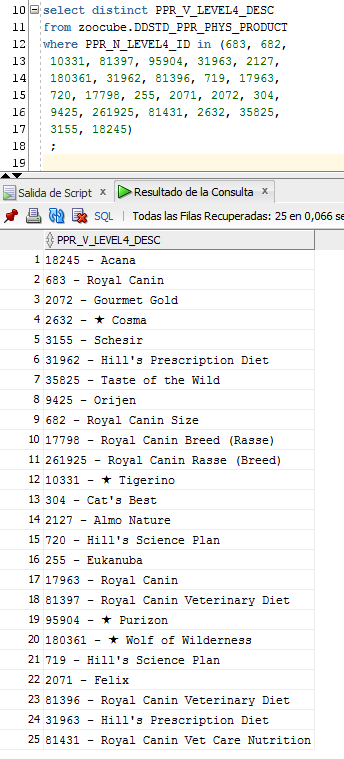

In [66]:
without_sp_disc.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_ID'].unique().value_counts().head(25)

[283]       12068
[286]        2559
[683]        1865
[682]        1204
[10331]       863
[81397]       759
[2127]        661
[95904]       659
[31962]       648
[31963]       647
[81396]       606
[180361]      605
[719]         540
[17963]       528
[192127]      473
[17798]       471
[720]         463
[2071]        400
[255]         396
[2072]        395
[261925]      302
[304]         290
[81431]       283
[9425]        274
[35825]       251
Name: OSP_4_LEAD_P_PG_ID, dtype: int64

In [67]:
[i[0] for i in without_sp_disc.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_ID'].unique().value_counts().head(50).index]

[283,
 286,
 683,
 682,
 10331,
 81397,
 2127,
 95904,
 31962,
 31963,
 81396,
 180361,
 719,
 17963,
 192127,
 17798,
 720,
 2071,
 255,
 2072,
 261925,
 304,
 81431,
 9425,
 35825,
 2632,
 47690,
 3155,
 72745,
 18245,
 2044,
 207615,
 394,
 2056,
 11751,
 218624,
 9498,
 205710,
 95460,
 2180,
 207617,
 39209,
 3243,
 10728,
 201878,
 302,
 128993,
 42545,
 263820,
 35032]

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
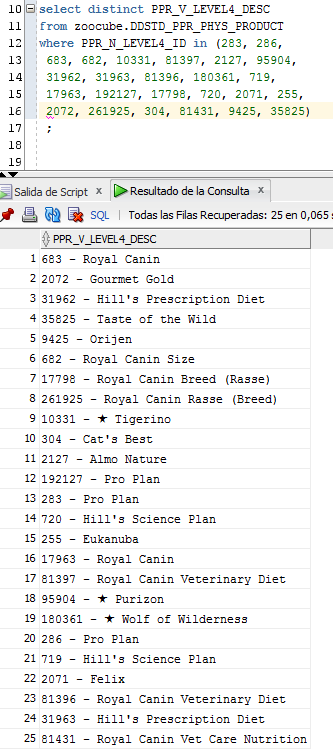

Royal Canin and Hill's appearing often

In [68]:
clean_ord['SV_PP'] = (clean_ord['SCM_SALES_BMF'] * clean_ord['POS_VALID']).groupby(clean_ord['SCM_N_ORDER_NR']).transform('sum')

In [69]:
clean_ord['OP_SHARE_PP'] = (clean_ord['SCM_SALES_BMF'] * clean_ord['POS_VALID']) / clean_ord['SV_PP']

In [70]:
clean_ord[clean_ord['SCM_N_ORDER_NR'] == 111520099][['SCM_SALES_BMF', 'POS_VALID', 'DISC_POS', 'SV_PP', 'PP_NAME', 'OP_SHARE_PP']]

,SCM_SALES_BMF,POS_VALID,DISC_POS,SV_PP,PP_NAME,OP_SHARE_PP
448,22.9900,1,1,76.96,Pro Plan Cat Sterilised reich an Truthahn,0.298727
41134,20.3909,1,1,76.96,PRO PLAN STERILISED CAT,0.264955
41135,20.3640,1,1,76.96,PRO PLAN ADULT CAT CHICKEN,0.264605
67733,2.5991,1,1,76.96,Pro Plan Adult 85 g,0.033772
67734,2.6260,1,1,76.96,Pro Plan Adult 85 g,0.034122
110876,0.0000,1,0,76.96,Catessy Knabber-Snack 65 g,0.000000
120402,7.9900,1,0,76.96,Drinkwell Trinkbrunnen,0.103820


In [71]:
clean_ord['ORDER_SHARE_PP'] = (clean_ord['OP_SHARE_PP'] * clean_ord['POS_VALID'] * clean_ord['DISC_POS']).groupby(clean_ord['SCM_N_ORDER_NR']).transform('sum')

In [72]:
clean_ord[clean_ord['SCM_N_ORDER_NR'] == 111520099][['SCM_SALES_BMF', 'POS_VALID', 'DISC_POS',
                                                     'SV_PP', 'PP_NAME', 'OP_SHARE_PP', 'ORDER_SHARE_PP']]

,SCM_SALES_BMF,POS_VALID,DISC_POS,SV_PP,PP_NAME,OP_SHARE_PP,ORDER_SHARE_PP
448,22.9900,1,1,76.96,Pro Plan Cat Sterilised reich an Truthahn,0.298727,0.89618
41134,20.3909,1,1,76.96,PRO PLAN STERILISED CAT,0.264955,0.89618
41135,20.3640,1,1,76.96,PRO PLAN ADULT CAT CHICKEN,0.264605,0.89618
67733,2.5991,1,1,76.96,Pro Plan Adult 85 g,0.033772,0.89618
67734,2.6260,1,1,76.96,Pro Plan Adult 85 g,0.034122,0.89618
110876,0.0000,1,0,76.96,Catessy Knabber-Snack 65 g,0.000000,0.89618
120402,7.9900,1,0,76.96,Drinkwell Trinkbrunnen,0.103820,0.89618


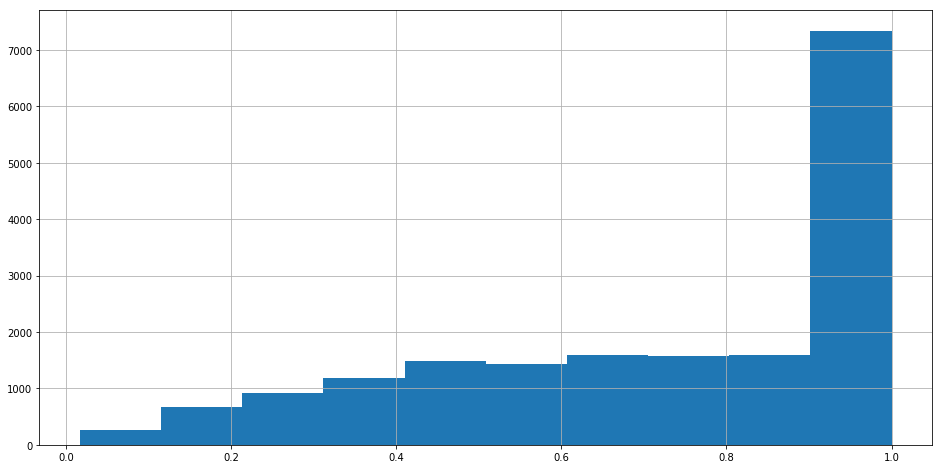

In [73]:
plt.figure(figsize=(16,8))
plt.hist(clean_ord.groupby('SCM_N_ORDER_NR')['ORDER_SHARE_PP'].mean(), bins=10)
plt.grid()

In [74]:
clean_ord.groupby('SCM_N_ORDER_NR')['ORDER_SHARE_PP'].mean().describe()

count    18038.000000
mean         0.729006
std          0.276186
min          0.016687
25%          0.507723
50%          0.798470
75%          1.000000
max          1.000000
Name: ORDER_SHARE_PP, dtype: float64

In [75]:
clean_ord.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_SHARE'].mean().describe()

count    18038.000000
mean         0.743884
std          0.231706
min          0.148000
25%          0.544500
50%          0.772800
75%          1.000000
max          1.000000
Name: OSP_4_LEAD_P_PG_SHARE, dtype: float64

In [76]:
data.columns

Index(['SCM_N_ORDER_POS_NR', 'SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE',
       'THR_C_KEY_ORDER_HOUR', 'SIT_N_KEY_SITE', 'CUS_N_KEY_CUSTOMER',
       'SCM_SALES_BMF', 'SCM_SALES_CANCEL_BMF', 'SCM_D_FINANCE_CM1',
       'SCM_D_FINANCE_CM2', 'SCM_D_ORIG_FINANCE_ORDER_NET', 'SCM_AP_ID',
       'SCM_AS_ID', 'SCM_MASTER_AP_ID', 'SCM_IS_ZSP_ORDER',
       'SCM_C_ORDER_STATUS', 'CTP_N_KEY_CUSTOMER_TYPE', 'SCM_OCI_LAND',
       'OSP_KO_COUNT_NET', 'OSP_3_LEAD_P_PG_ID', 'OSP_3_LEAD_P_PG_SHARE',
       'OSP_4_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_SHARE', 'CZP_START_DATE',
       'CZP_EXPIRY_DATE', 'CZP_ZTQ_ID', 'CZP_PERCENTAGE', 'CZP_PRICE', 'PP_ID',
       'PG_ID', 'PG4_PARENT_ID', 'PG3_PARENT_ID', 'PP_NAME', 'AP_SHORT_TEXT',
       'ORDER_DATETIME', 'WEEK_NUMBER', 'MONTH_NUMBER', 'FINANCE_ORDER_NET',
       'REL_CM1', 'REL_CM2', 'POS_VALID', 'TAXES', 'BASKET_VALUE',
       'O_POS_SHARE'],
      dtype='object')

In [77]:
counter = data.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()
pg4id = data.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_ID'].mean()
pg4share = data.groupby('SCM_N_ORDER_NR')['OSP_4_LEAD_P_PG_SHARE'].mean()
sales = data.groupby('SCM_N_ORDER_NR')['BASKET_VALUE'].mean()
week = data.groupby('SCM_N_ORDER_NR')['WEEK_NUMBER'].mean()
customer = data.groupby('SCM_N_ORDER_NR')['CUS_N_KEY_CUSTOMER'].mean()

In [78]:
df = pd.concat([counter, pg4id, pg4share, sales, week, customer], axis=1)
df['ORDER_ID'] = df.index

In [79]:
df.sample(10)

,OSP_KO_COUNT_NET,OSP_4_LEAD_P_PG_ID,OSP_4_LEAD_P_PG_SHARE,BASKET_VALUE,WEEK_NUMBER,CUS_N_KEY_CUSTOMER,ORDER_ID
SCM_N_ORDER_NR,,,,,,,
109333752,12,10331,0.2775,215.58,17,1209613,109333752
112054511,14,682,0.7016,62.29,23,2816707,112054511
113080861,27,39209,1.0000,75.98,25,9692022,113080861
108089201,25,17963,0.5142,37.21,14,15901103,108089201
104454317,41,9425,0.8296,83.58,6,10938386,104454317
108484536,15,283,0.6579,75.98,15,12488241,108484536
109606691,16,81396,1.0000,56.99,17,10305123,109606691
104759536,6,3155,0.8289,177.48,7,14799000,104759536
110950179,60,101,0.4476,49.82,20,5140186,110950179


In [80]:
main_pgs = [283,
 286,
 683,
 682,
 10331,
 81397,
 2127,
 95904,
 31962,
 31963,
 81396,
 180361,
 719,
 17963,
 192127,
 17798,
 720,
 2071,
 255,
 2072,
 261925,
 304,
 81431,
 9425,
 35825]

#### Orders per Lead PG along the order counter

In [81]:
count_pg4_pt = pd.pivot_table(df, values= 'ORDER_ID', index='OSP_4_LEAD_P_PG_ID',
               columns='OSP_KO_COUNT_NET', aggfunc='count').fillna(0).loc[main_pgs, :40]

In [82]:
count_pg4_pt

OSP_KO_COUNT_NET,2,3,4,5,6,7,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
OSP_4_LEAD_P_PG_ID,,,,,,,,,,,,,,,,,,,,,
283,1.0,34.0,84.0,120.0,148.0,180.0,230.0,259.0,320.0,339.0,...,229.0,237.0,203.0,193.0,178.0,165.0,166.0,164.0,146.0,138.0
286,0.0,16.0,38.0,47.0,57.0,54.0,59.0,63.0,75.0,79.0,...,36.0,29.0,41.0,33.0,39.0,31.0,25.0,34.0,22.0,23.0
683,0.0,6.0,12.0,26.0,33.0,37.0,40.0,36.0,42.0,38.0,...,32.0,23.0,27.0,22.0,30.0,20.0,17.0,16.0,20.0,22.0
682,0.0,3.0,6.0,16.0,9.0,18.0,24.0,30.0,32.0,35.0,...,15.0,15.0,14.0,17.0,10.0,11.0,14.0,17.0,14.0,9.0
10331,0.0,1.0,5.0,10.0,5.0,12.0,17.0,20.0,14.0,18.0,...,8.0,15.0,7.0,10.0,5.0,4.0,8.0,8.0,9.0,10.0
81397,0.0,3.0,3.0,6.0,10.0,10.0,15.0,13.0,22.0,26.0,...,14.0,9.0,9.0,12.0,14.0,12.0,10.0,9.0,8.0,7.0
2127,0.0,2.0,3.0,3.0,4.0,3.0,5.0,11.0,9.0,12.0,...,8.0,9.0,6.0,7.0,7.0,11.0,9.0,6.0,7.0,8.0
95904,0.0,4.0,7.0,11.0,12.0,9.0,17.0,29.0,19.0,14.0,...,6.0,4.0,5.0,8.0,12.0,7.0,9.0,11.0,7.0,7.0
31962,0.0,3.0,1.0,4.0,3.0,3.0,7.0,7.0,17.0,15.0,...,7.0,8.0,8.0,9.0,17.0,11.0,15.0,10.0,14.0,10.0


In [83]:
sort_pg4 = list(count_pg4_pt.apply(np.sum, axis=1).sort_values(ascending=False).index)

In [84]:
sort_pg4

[283,
 286,
 683,
 682,
 81397,
 10331,
 31963,
 81396,
 180361,
 31962,
 95904,
 719,
 17798,
 17963,
 2127,
 720,
 192127,
 255,
 261925,
 2072,
 81431,
 35825,
 2071,
 9425,
 304]

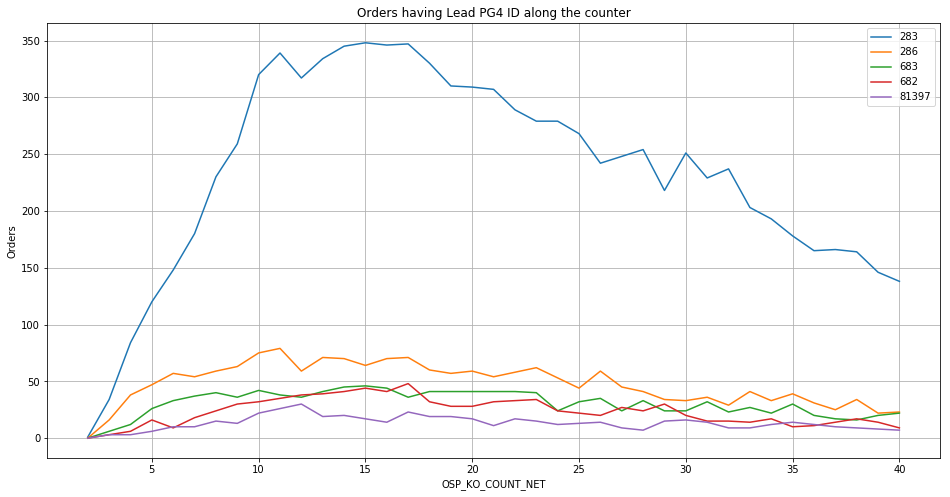

In [85]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[:5]:
    data_i = count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Orders having Lead PG4 ID along the counter')
plt.legend(sort_pg4[:5]) 
plt.show()

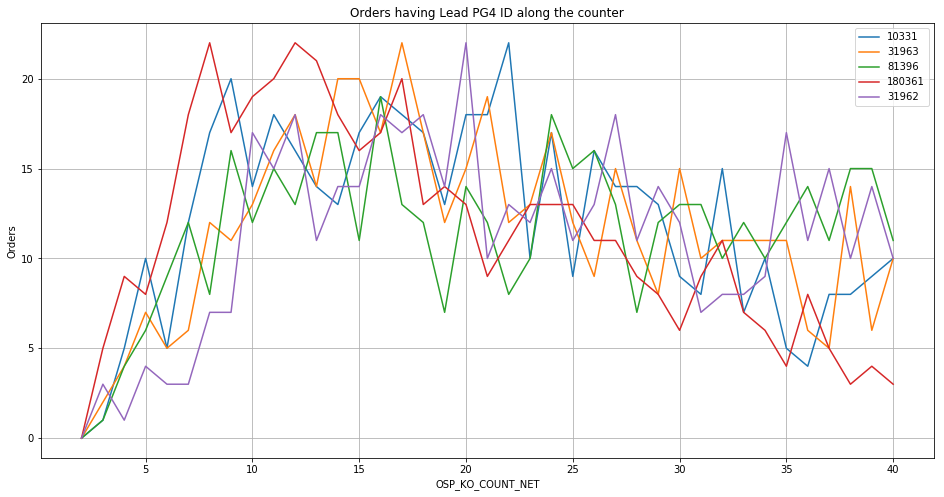

In [86]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[5:10]:
    data_i = count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Orders having Lead PG4 ID along the counter')
plt.legend(sort_pg4[5:10]) 
plt.show()

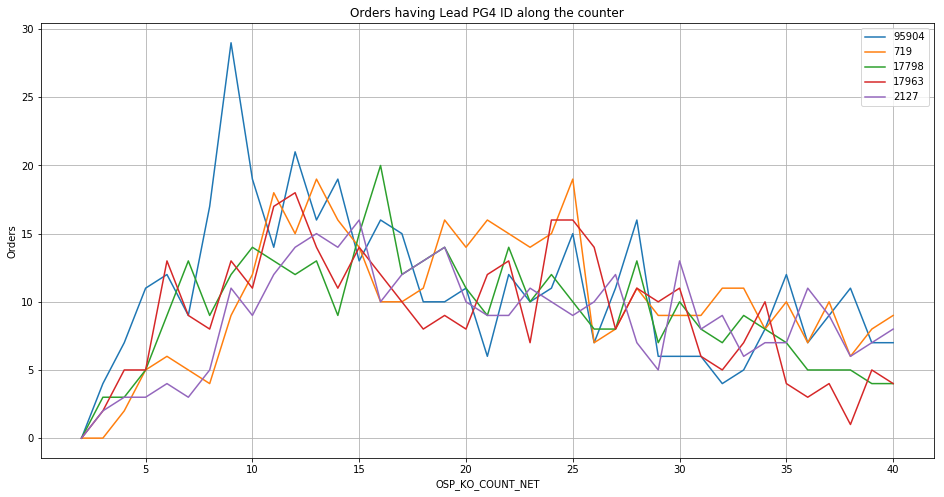

In [87]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[10:15]:
    data_i = count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Orders having Lead PG4 ID along the counter')
plt.legend(sort_pg4[10:15]) 
plt.show()

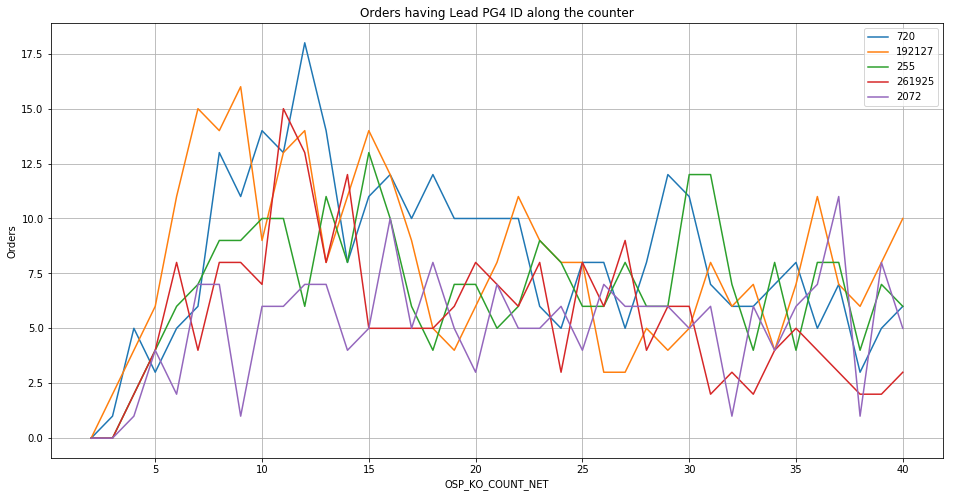

In [88]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[15:20]:
    data_i = count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Orders having Lead PG4 ID along the counter')
plt.legend(sort_pg4[15:20]) 
plt.show()

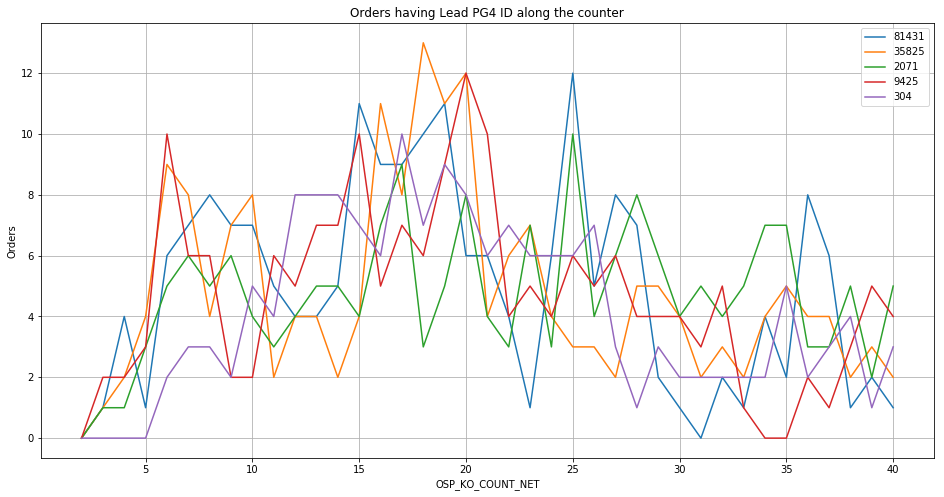

In [89]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[20:25]:
    data_i = count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Orders having Lead PG4 ID along the counter')
plt.legend(sort_pg4[20:25]) 
plt.show()

#### Basket median per PG4 ID along the counter

In [90]:
count_basket_median_pg4_pt = pd.pivot_table(df, values= 'BASKET_VALUE', index='OSP_4_LEAD_P_PG_ID',
               columns='OSP_KO_COUNT_NET', aggfunc=np.median).fillna(0).loc[main_pgs, :40].round(2)

In [91]:
count_basket_median_pg4_pt

OSP_KO_COUNT_NET,2,3,4,5,6,7,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
OSP_4_LEAD_P_PG_ID,,,,,,,,,,,,,,,,,,,,,
283,115.38,64.08,69.24,75.02,80.11,76.81,82.94,81.69,79.95,90.20,...,83.63,82.62,83.10,81.69,85.00,83.57,88.34,90.24,88.34,77.64
286,0.00,65.62,66.22,60.40,66.95,65.10,74.08,73.59,71.23,71.23,...,59.88,66.43,75.62,71.23,69.33,76.24,72.52,92.12,89.26,72.15
683,0.00,64.07,61.54,67.48,67.40,60.76,59.13,60.94,58.36,65.67,...,89.97,71.23,77.14,86.32,71.65,51.86,78.83,78.22,76.90,59.83
682,0.00,94.48,98.79,85.49,48.08,85.48,85.49,83.21,80.00,56.96,...,98.18,70.29,87.84,56.71,83.19,62.69,67.44,78.18,87.40,71.24
10331,0.00,25.81,45.57,40.56,65.04,49.28,50.12,46.52,57.90,48.89,...,42.48,47.46,39.94,49.82,45.58,55.91,66.79,44.89,44.61,47.36
81397,0.00,94.48,138.64,52.26,54.96,79.27,58.55,65.54,70.23,53.19,...,77.38,60.41,53.18,57.36,56.13,54.49,52.84,72.16,60.31,52.69
2127,0.00,105.37,56.01,92.09,88.45,125.21,85.88,61.82,56.48,55.52,...,70.25,48.94,84.98,40.79,55.75,69.06,85.36,46.00,56.95,74.31
95904,0.00,55.90,47.01,75.49,69.69,52.33,81.24,62.20,56.01,48.68,...,68.26,93.16,68.26,89.16,83.29,85.48,74.97,94.16,56.08,78.83
31962,0.00,129.16,66.49,117.78,88.15,127.27,93.53,81.68,101.63,79.77,...,56.99,103.68,109.54,104.57,99.72,90.23,105.41,94.10,80.72,100.88


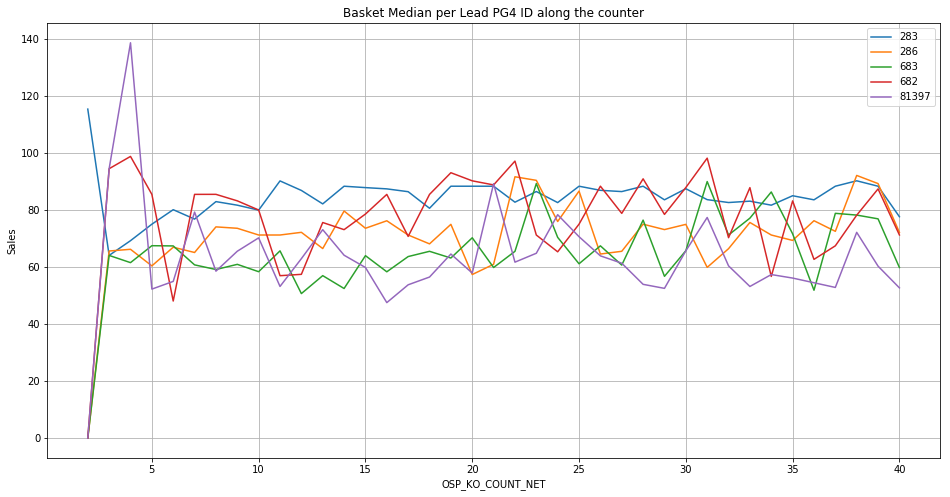

In [92]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[:5]:
    data_i = count_basket_median_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Sales')
plt.title('Basket Median per Lead PG4 ID along the counter')
plt.legend(sort_pg4[:5]) 
plt.show()

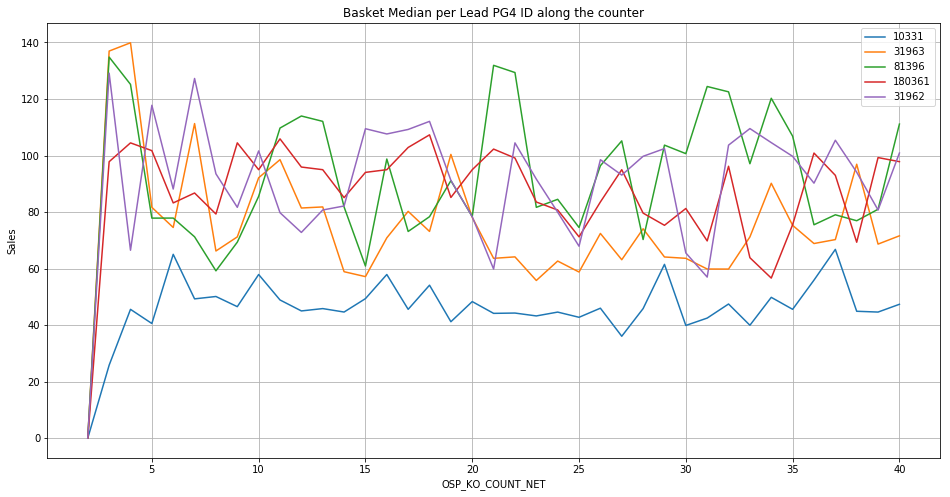

In [93]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[5:10]:
    data_i = count_basket_median_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Sales')
plt.title('Basket Median per Lead PG4 ID along the counter')
plt.legend(sort_pg4[5:10]) 
plt.show()

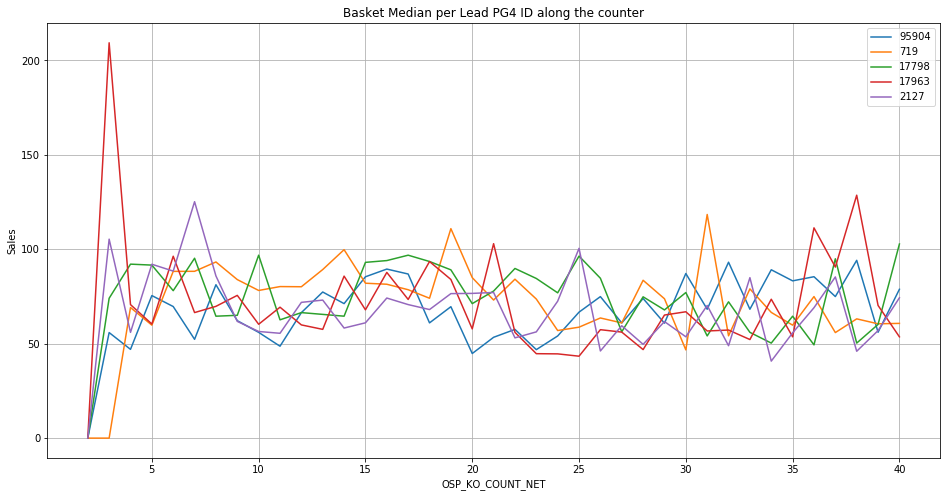

In [94]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[10:15]:
    data_i = count_basket_median_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Sales')
plt.title('Basket Median per Lead PG4 ID along the counter')
plt.legend(sort_pg4[10:15]) 
plt.show()

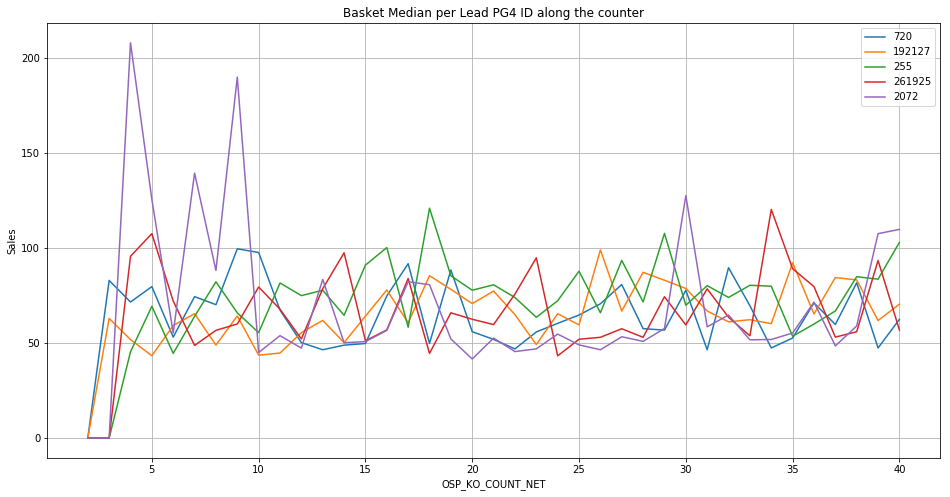

In [95]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[15:20]:
    data_i = count_basket_median_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Sales')
plt.title('Basket Median per Lead PG4 ID along the counter')
plt.legend(sort_pg4[15:20]) 
plt.show()

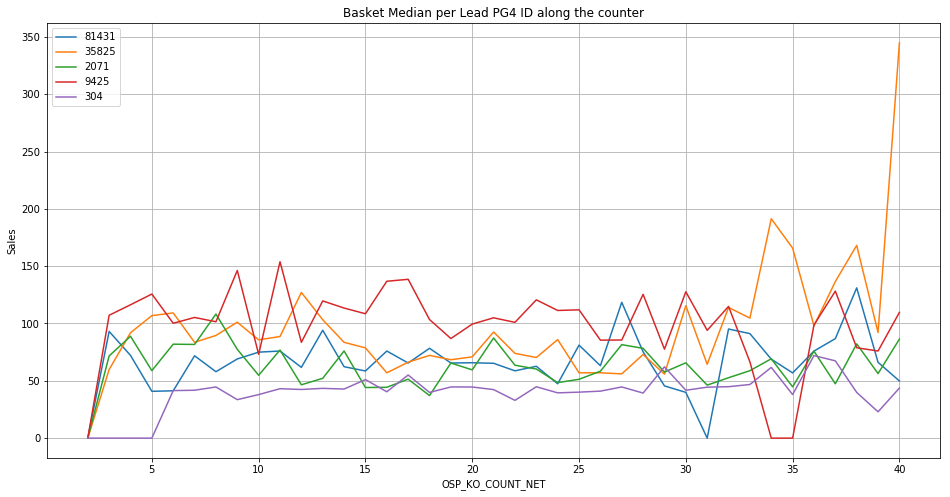

In [96]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[20:25]:
    data_i = count_basket_median_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Sales')
plt.title('Basket Median per Lead PG4 ID along the counter')
plt.legend(sort_pg4[20:25]) 
plt.show()

#### Weekly orders per Lead PG4

In [97]:
weekly_count_pg4_pt = pd.pivot_table(df, values= 'ORDER_ID', index='OSP_4_LEAD_P_PG_ID',
               columns='WEEK_NUMBER', aggfunc='count').fillna(0).loc[main_pgs, :40]

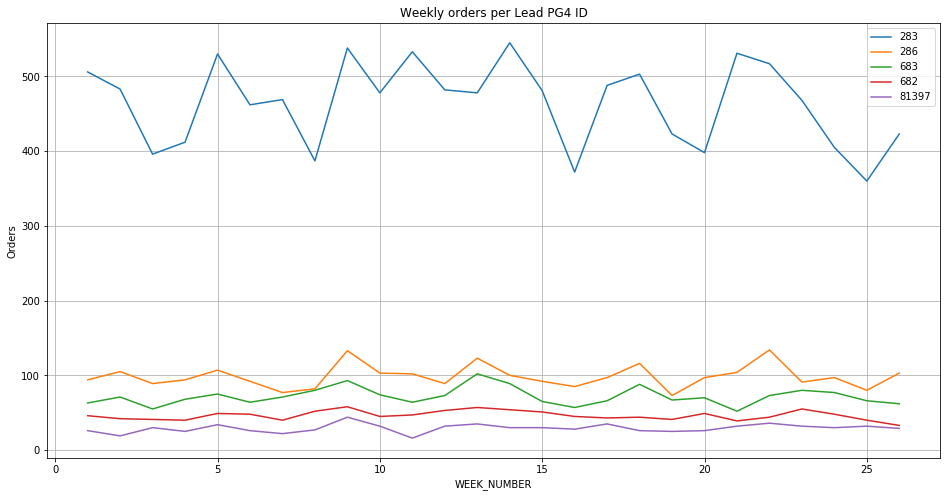

In [98]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[:5]:
    data_i = weekly_count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Weekly orders per Lead PG4 ID')
plt.legend(sort_pg4[:5]) 
plt.show()

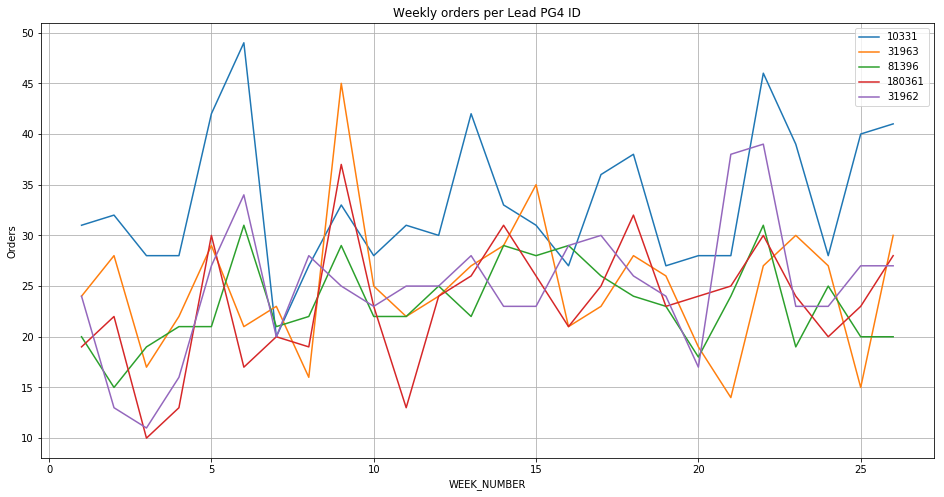

In [99]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[5:10]:
    data_i = weekly_count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Weekly orders per Lead PG4 ID')
plt.legend(sort_pg4[5:10]) 
plt.show()

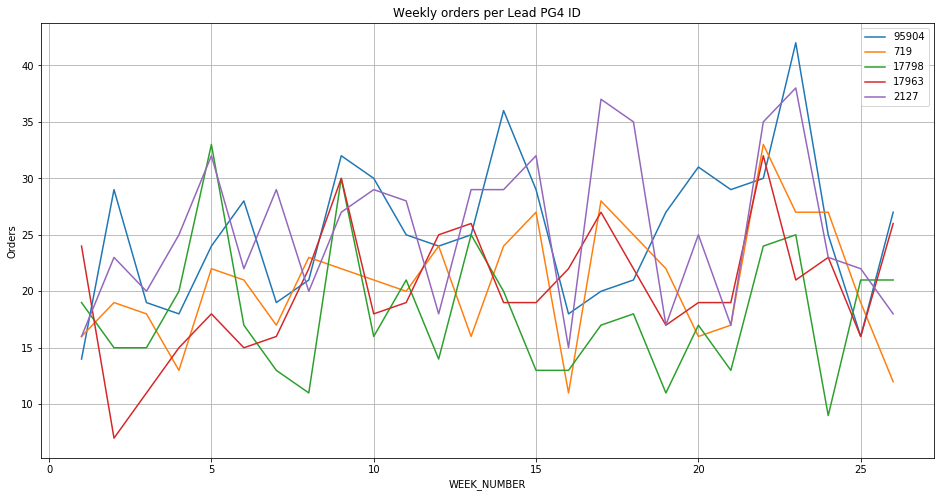

In [100]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[10:15]:
    data_i = weekly_count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Weekly orders per Lead PG4 ID')
plt.legend(sort_pg4[10:15]) 
plt.show()

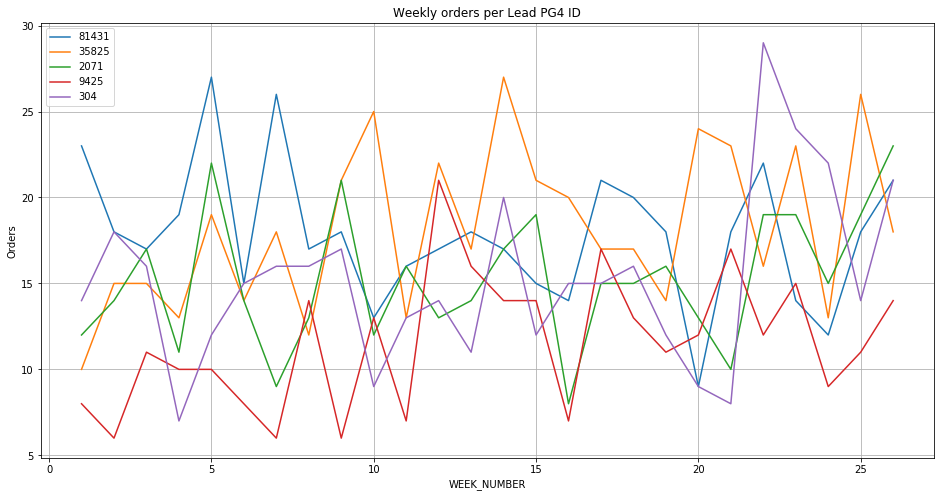

In [101]:
plt.figure(figsize=(16, 8))

for i in sort_pg4[15:20]:
    data_i = weekly_count_pg4_pt.loc[i]
    data_i.plot()

plt.grid(True)
plt.ylabel('Orders')
plt.title('Weekly orders per Lead PG4 ID')
plt.legend(sort_pg4[20:25]) 
plt.show()

#### Customer behaviour

In [102]:
data.groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique().describe()

count    11909.000000
mean         3.370140
std          2.772357
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         55.000000
Name: SCM_N_ORDER_NR, dtype: float64

In [103]:
data['CUS_N_KEY_CUSTOMER'].nunique()

11909

In [164]:
cus_dict_pg4 = {}

for i in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == i].groupby('OSP_KO_COUNT_NET', as_index=False)['OSP_4_LEAD_P_PG_ID'].mean()
    cus_dict_pg4[i] = list(cus_data.sort_values(by='OSP_KO_COUNT_NET')['OSP_4_LEAD_P_PG_ID'])

In [165]:
cus_dict_sales = {}

for i in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == i].groupby('OSP_KO_COUNT_NET', as_index=False)['BASKET_VALUE'].mean()
    cus_dict_sales[i] = list(cus_data.sort_values(by='OSP_KO_COUNT_NET')['BASKET_VALUE'].round(2))

In [166]:
chosen_pg4 = [283, 286, 192127]

In [265]:
# Between 0 and 1 we create a scale of how far are customer orders Lead PG4 compared with the chosen ones. 
# 0 means chosen PG4 iDs appearing in every order and 1 no chosen PG4.
# Then we add: total orders, Main PG4, orders in which Main PG4 is present 
cus_dict_info = {}

for i in np.sort(data['CUS_N_KEY_CUSTOMER'].unique()):
    cus_dict_info[i] = {}
    #cus_dict_info[i]['pg4'] = cus_dict_pg4[i]
    #cus_dict_info[i]['basket_values'] = cus_dict_sales[i]
    cus_dict_info[i]['total_sales'] = sum(cus_dict_sales[i])
    cus_dict_info[i]['orders'] = len(cus_dict_sales[i])
    cus_dict_info[i]['orders_info'] = [(x, y) for x, y in zip(cus_dict_pg4[i], cus_dict_sales[i])]
    cus_dict_info[i]['distance'] = (len(cus_dict_sales[i]) - sum([pg4 in chosen_pg4 for pg4 in cus_dict_pg4[i]])) / len(cus_dict_pg4[i])
    c = Counter(cus_dict_pg4[i])
    ord_per_pg4 = sorted(c.most_common() , key= lambda x: x[0], reverse=True)
    sales_per_pg4 = sorted([(pg4_,sum([sales_ for pg_, sales_ in cus_dict_info[i]['orders_info'] if pg_== pg4_])) 
                                         for pg4_ in set([pg4 for pg4, sales in cus_dict_info[i]['orders_info']])], key= lambda x: x[0], reverse=True)
    cus_dict_info[i]['pg4_ord_sales'] = sorted([(x[0], x[1], y[1]) for x, y in zip(ord_per_pg4, sales_per_pg4)], key= lambda x: (x[1], x[2]), reverse=True)
    cus_dict_info[i]['main_pg4'] = cus_dict_info[i]['pg4_ord_sales'][0][0]
    cus_dict_info[i]['main_pg4_%_ord'] = np.round(cus_dict_info[i]['pg4_ord_sales'][0][1] / cus_dict_info[i]['orders'], 2)
    cus_dict_info[i]['main_pg4_%_sales'] = np.round(cus_dict_info[i]['pg4_ord_sales'][0][2] / cus_dict_info[i]['total_sales'], 2)

In [266]:
cus_dict_pg4[list(cus_dict_pg4.keys())[14]]

[49829,
 918,
 918,
 464,
 74,
 1173,
 919,
 920,
 286,
 92,
 720,
 720,
 207619,
 465,
 314,
 49829,
 49727,
 10331,
 10331,
 1070]

In [267]:
cus_dict_sales[list(cus_dict_pg4.keys())[14]]

[34.67,
 86.05,
 169.47,
 42.94,
 123.49,
 106.86,
 304.93,
 312.76,
 102.57,
 104.76,
 108.05,
 235.16,
 38.09,
 93.54,
 73.56,
 256.56,
 164.33,
 125.76,
 270.51,
 61.74]

In [268]:
cus_dict_info[list(cus_dict_pg4.keys())[14]]

{'distance': 0.95,
 'main_pg4': 10331,
 'main_pg4_%_ord': 0.1,
 'main_pg4_%_sales': 0.14,
 'orders': 20,
 'orders_info': [(49829, 34.67),
  (918, 86.05),
  (918, 169.47),
  (464, 42.94),
  (74, 123.49),
  (1173, 106.86),
  (919, 304.93),
  (920, 312.76),
  (286, 102.57),
  (92, 104.76),
  (720, 108.05),
  (720, 235.16),
  (207619, 38.09),
  (465, 93.54),
  (314, 73.56),
  (49829, 256.56),
  (49727, 164.33),
  (10331, 125.76),
  (10331, 270.51),
  (1070, 61.74)],
 'pg4_ord_sales': [(10331, 2, 396.27),
  (720, 2, 343.21),
  (49829, 2, 291.23),
  (918, 2, 255.51999999999998),
  (920, 1, 312.76),
  (919, 1, 304.93),
  (49727, 1, 164.33),
  (74, 1, 123.49),
  (1173, 1, 106.86),
  (92, 1, 104.76),
  (286, 1, 102.57),
  (465, 1, 93.54),
  (314, 1, 73.56),
  (1070, 1, 61.74),
  (464, 1, 42.94),
  (207619, 1, 38.09)],
 'total_sales': 2815.8}

In [269]:
cus_attr = pd.DataFrame.from_dict(cus_dict_info, orient='index').round(2)

In [270]:
cus_attr.head(20)

,total_sales,orders,orders_info,distance,pg4_ord_sales,main_pg4,main_pg4_%_ord,main_pg4_%_sales
372507,129.38,2,"[(283, 87.28), (1412, 42.1)]",0.50,"[(283, 1, 87.28), (1412, 1, 42.1)]",283.0,0.50,0.67
603899,169.74,1,"[(2072, 169.74)]",1.00,"[(2072, 1, 169.74)]",2072.0,1.00,1.00
613442,271.79,5,"[(9498, 44.14), (9498, 53.9), (151599, 53.16),...",1.00,"[(9498, 3, 145.98), (31962, 1, 72.65), (151599...",9498.0,0.60,0.54
626438,739.57,7,"[(286, 107.95), (719, 105.16), (719, 98.67), (...",0.57,"[(286, 3, 327.76), (719, 3, 313.99), (1070, 1,...",286.0,0.43,0.44
635902,430.45,6,"[(95904, 63.6), (72002, 58.95), (72002, 101.41...",1.00,"[(72002, 5, 366.85), (95904, 1, 63.6)]",72002.0,0.83,0.85
643290,225.02,5,"[(528, 47.11), (1520, 44.26), (31963, 39.05), ...",1.00,"[(528, 2, 100.28), (31963, 2, 80.4799999999999...",528.0,0.40,0.45
648828,91.18,1,"[(283, 91.18)]",0.00,"[(283, 1, 91.18)]",283.0,1.00,1.00
682209,583.59,4,"[(683, 228.04), (683, 93.99), (36072, 98.22), ...",1.00,"[(683, 3, 485.37), (36072, 1, 98.22)]",683.0,0.75,0.83
684441,262.61,3,"[(683, 112.61), (207640, 93.97), (128, 56.03)]",1.00,"[(683, 1, 112.61), (207640, 1, 93.97), (128, 1...",683.0,0.33,0.43
684669,216.53,1,"[(10331, 216.53)]",1.00,"[(10331, 1, 216.53)]",10331.0,1.00,1.00


In [272]:
# Only 6365 customers having at least 3 orders
cus_attr_3ord = cus_attr[cus_attr['orders'] >= 3]

In [276]:
len(cus_attr_3ord)

6365

In [273]:
cus_attr_3ord['distance'].describe()

count    6365.000000
mean        0.619896
std         0.408383
min         0.000000
25%         0.250000
50%         0.750000
75%         1.000000
max         1.000000
Name: distance, dtype: float64

In [274]:
cus_attr_3ord['orders'].describe()

count    6365.000000
mean        4.885467
std         2.903527
min         3.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        54.000000
Name: orders, dtype: float64

In [277]:
cus_attr_3ord['distance'].value_counts().head(25)

1.00    2813
0.00    1360
0.33     382
0.67     326
0.25     228
0.50     213
0.75     165
0.20     107
0.80     102
0.60      90
0.40      81
0.83      72
0.17      39
0.86      36
0.71      33
0.43      31
0.88      28
0.57      22
0.62      22
0.89      20
0.14      19
0.29      18
0.78      18
0.92      15
0.38      12
Name: distance, dtype: int64

In [278]:
cus_attr_3ord['orders'].value_counts().head(25)

3     2320
4     1510
5      935
6      542
7      355
8      231
9      142
10      87
11      65
12      39
14      28
13      24
15      16
18      12
17      11
16      10
21       6
23       5
20       5
24       4
19       3
25       3
22       2
32       2
31       1
Name: orders, dtype: int64

In [279]:
# 3834 (60%) customers from 6365 (>= 3 orders) placed more than the half of their orders in the selected period 
# without any chosen PG4 IDs as Lead PG
cus_attr_3ord[cus_attr_3ord['distance'] > 0.50].index

Int64Index([  613442,   626438,   635902,   643290,   682209,   684441,
              707557,   711674,   714583,   730887,
            ...
            19157984, 19220389, 19228937, 19247375, 19256376, 19331720,
            19417647, 19421567, 19621504, 19898145],
           dtype='int64', length=3834)

In [280]:
x = cus_attr_3ord[(cus_attr_3ord['distance'].between(0.01, 0.99)) & (cus_attr_3ord['orders'] <= 10)]['orders']
y = cus_attr_3ord[(cus_attr_3ord['distance'].between(0.01, 0.99)) & (cus_attr_3ord['orders'] <= 10)]['distance']

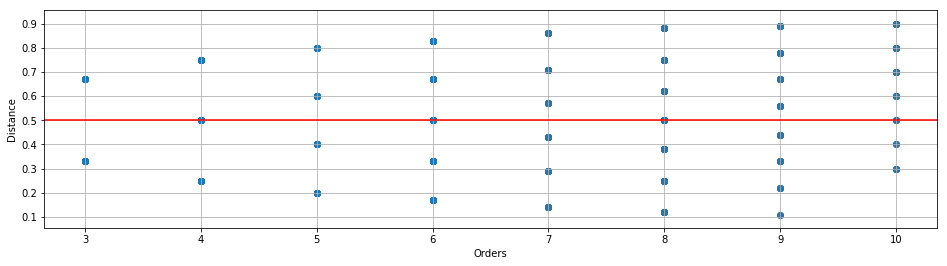

In [281]:
plt.figure(figsize=(16,4))
plt.scatter(x, y)
plt.xlabel('Orders')
plt.ylabel('Distance')
plt.axhline(0.5, color='red')
plt.grid()

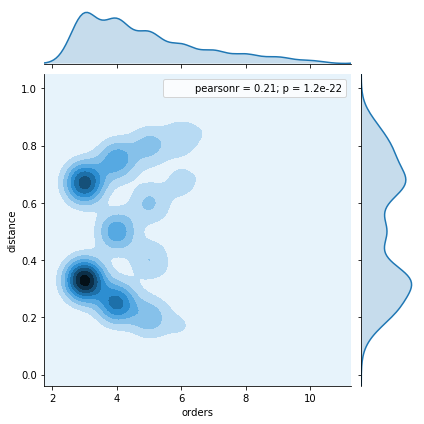

In [282]:
#Bimodal distribution when looking at distance (0-0.5, 0.5-1)
sns.jointplot(x=x, y=y, kind='kde')

In [234]:
ab = sorted(cus_dict_info[list(cus_dict_pg4.keys())[14]]['orders_per_pg4'], key= lambda x: x[0], reverse=True)

In [235]:
cd = sorted(cus_dict_info[list(cus_dict_pg4.keys())[14]]['sales_per_pg4'], key= lambda x: x[0], reverse=True)

In [246]:
sorted([(x[0], x[1], y[1]) for x, y in zip(ab, cd)], key= lambda x: (x[1], x[2]), reverse=True)

[(10331, 2, 396.27),
 (720, 2, 343.21),
 (49829, 2, 291.23),
 (918, 2, 255.51999999999998),
 (920, 1, 312.76),
 (919, 1, 304.93),
 (49727, 1, 164.33),
 (74, 1, 123.49),
 (1173, 1, 106.86),
 (92, 1, 104.76),
 (286, 1, 102.57),
 (465, 1, 93.54),
 (314, 1, 73.56),
 (1070, 1, 61.74),
 (464, 1, 42.94),
 (207619, 1, 38.09)]

In [108]:
c = Counter(cus_dict[list(cus_dict.keys())[14]])
c.most_common()

[(49829, 2),
 (918, 2),
 (720, 2),
 (10331, 2),
 (464, 1),
 (74, 1),
 (1173, 1),
 (919, 1),
 (920, 1),
 (286, 1),
 (92, 1),
 (207619, 1),
 (465, 1),
 (314, 1),
 (49727, 1),
 (1070, 1)]

In [109]:
cus_dict_dist[list(cus_dict.keys())[14]] 

[0.95, 20, 49829, 2]